# Project 4: Interest Point detection via Harris

The goal of this project is to implement the Harris Feature detector (described in lecture, in the textbook, and and in readings).

In each case, write your algorithm code in `project4.py`, and only use this notebook for testing.

## Part 1: Harris Feature Detector

Recall that the steps of Harris detection are, in a nutshell:

* Calculate the x derivative $I_{x}$ and the y  derivative $I_{y}$ of the image using a simple Sobel (3x3 window)
* Given those new derivative values (which are 2D arrays just like your image, calculate three new arrays: 
    * $I_{xx} = I_{x} * I_{x}$
    * $I_{xy} = I_{x} * I_{y}$
    * $I_{yy} = I_{y} * I_{y}$
    * (hint: these are very simple)
* Convolve each image above with a gaussian kernel (window 5), to produce new arrays 
    * $\langle I_{xx} \rangle$
    * $\langle I_{xy} \rangle$
    * $\langle I_{yy} \rangle$
* Now ,for every coordinate in your image, calculate the following structure tensor:

$
\begin{bmatrix}
\langle I_{xx} \rangle & \langle I_{xy} \rangle \\
\langle I_{yx} \rangle & \langle I_{yy} \rangle \\
\end{bmatrix}
$

* Now, for each pixel in your output image (same dimensions as your input image),  calculate:

$ R = Det(A) - k*Trace(A)^{2} $


(use k = 0.04)

* once you have your array of R values, threshold them to only keep values within 1% of the max R in your image.



In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

### Harris Testing 

* This code will find interest points on the sample image from the slides and then draw red dots on top of the interest points. 

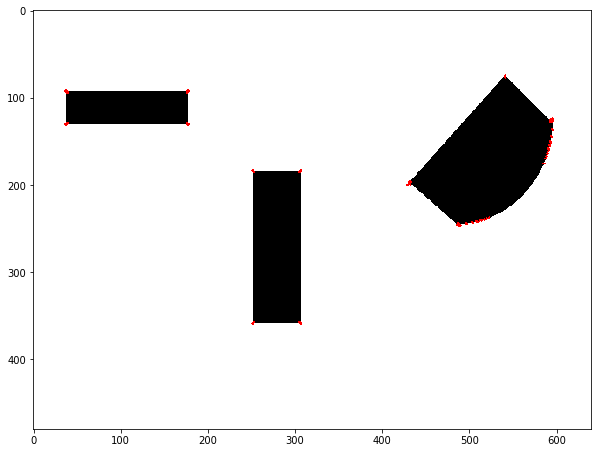

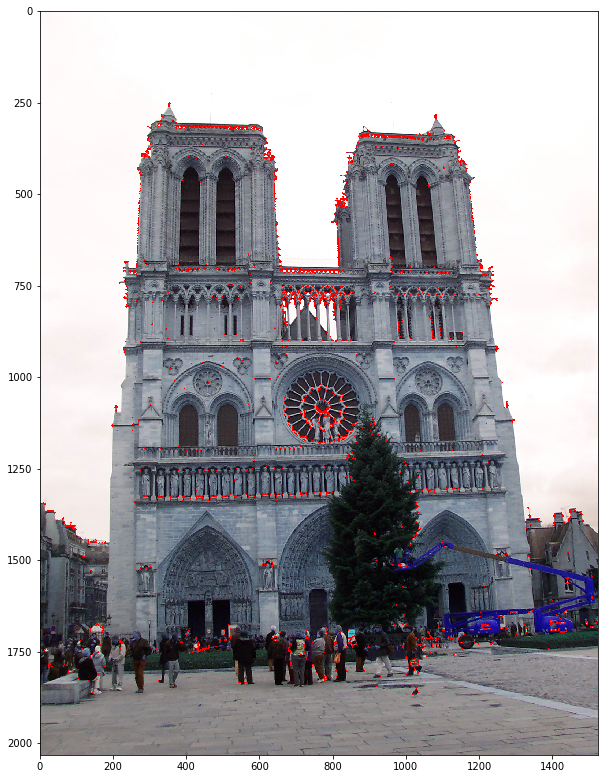

In [2]:
from project4 import *
plt.rcParams["figure.figsize"] = (10,20)

img = cv2.imread('testimage.pgm')
img2 = cv2.imread('nd1.jpg')
img3 = cv2.imread('nd2.jpg')

Responses = HarrisDetector(img,k=0.04)
img[Responses>0.01*Responses.max()]=[255,0,0]
plt.figure()
plt.imshow(img)

Responses2 = HarrisDetector(img2,k=0.04)
img2[Responses2>0.01*Responses2.max()]=[255,0,0]
plt.figure()
plt.imshow(img2)


        

## Part 2: non-maximal suppression 

The results of your harris detector probably find way too many features, even for a simple test image.  To reduce the number, use the non-maximal suppression algorithm described in lecture, slides, and in the comments of `project4.py`.

The idea is to only detect features that are bothlocal maxima and whose response value is significantly (10%)   greater than that of all of its neighbors within a radius r.

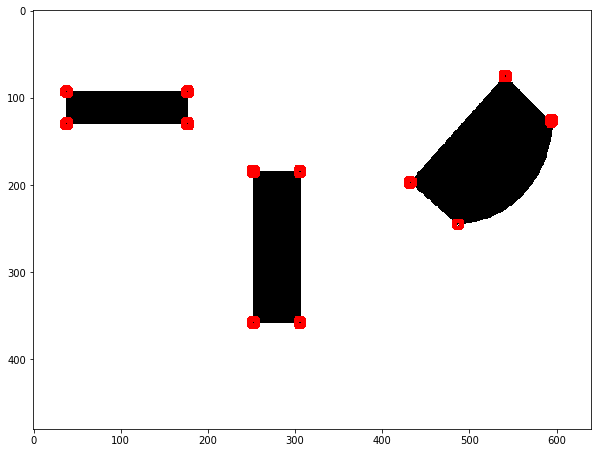

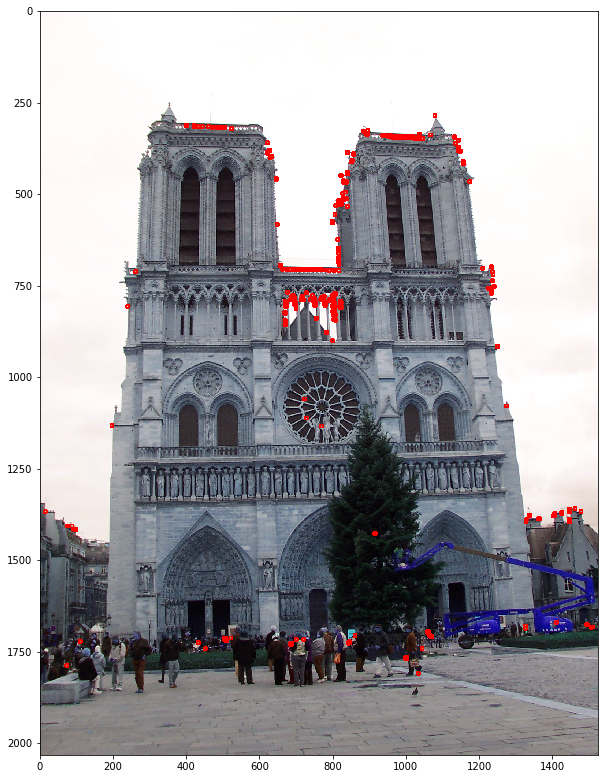

In [3]:
img = cv2.imread('testimage.pgm')
img2 = cv2.imread('nd1.jpg')
img3 = cv2.imread('nd2.jpg')

xvals,yvals = SuppressNonMax(Responses,60)
for i in range(len(xvals)):
    cv2.rectangle(img,(xvals[i]-4,yvals[i]-4),(xvals[i]+4,yvals[i]+4), (255,0,0),3)
#     img2[xvals[i]][yvals[i]]=[255,0,0]

plt.figure()
plt.imshow(img)

xvals,yvals = SuppressNonMax(Responses2,1000)
for i in range(len(xvals)):
    cv2.rectangle(img2,(xvals[i]-4,yvals[i]-4),(xvals[i]+4,yvals[i]+4), (255,0,0),3)
#     img2[xvals[i]][yvals[i]]=[255,0,0]

plt.figure()
plt.imshow(img2)


### Writeup
In order for my Harris Detector algorithm to work, I implemented it in a specific way. First I converted the image to a gray scale image and then I found the eigen x and y values using the sobel edge functions that I created. Then I find the eigenvalues of x-x, x-y, and y-y by multiplying them to each other. From there I run a Gaussian Blur over them. Then for each pixel I calculate A and figure out the r (response strength) values for every one of them and return them.

For Part 2, I wrote my non-local maxima suppression function by going through the entire list of r (response strength) values and add them to a list of tuples with their corresponding x and y values. (I did this because I need to keep track of the x and y values after calculating the distance and suppressed radii). I sort the tuples from the largest to smallest r values and I iterate through the entire list (except for the first item) to compute the distance from the current pixel that we're looking at to the rest of them. So as we iterate through more pixels, we have to perform more computations. Because this is the case, that makes it really hard to compute all of the distances between all the pixels. Therefore I decided to cap the maximum number of computations to be the numPts times 2. This should make the program executable and not run forever.

So after finding all of the distances, I find the minimum distances between iterations and save them to a list called radii. After that I create 2 new lists - one for the x values and one for the y values and I have a for loop that adds the x and y values for numPts to their corresponding lists. Then I convert those lists into 1D numpy arrays and return both of them.
